
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKIPfip6A054WkKKPkNjlcFIE9cd4TBrZ5Jg&usqp=CAU" style="float:right" width="400" >

## **Modelo predictivo basado en Regresión Logística para determinar si un paciente sobrevive o muere al ingresar a Cuidados Intensivos**

### Omar Urena

**Utilizando regresión logística en Python y el dataset adjunto, responder las
siguientes preguntas:**
1. ¿Cuáles son las principales variables que influyen en que un paciente salga
con vida de la sala de cuidado intensivos?
2. ¿Cumple con todas hipótesis de validación de un buen modelo? Explique
3. ¿Puede este modelo explicar el comportamiento de los pacientes que
ingresan a la sala de cuidados intensivos? Explique
4. Comparar RL con otros modelos

**Repuesta al final de NoteBook**


**Variables:**

| Número | Name                       | Codes/Values                        | Abbreviations |
|--------|----------------------------|-------------------------------------|---------------|
| 1      | Identification Code       | ID Number                           | ID            |
| 2      | Vital Status              | 0 = Lived / 1 = Died                | STA  (target)        |
| 3      | Age Years                 |                                     | AGE           |
| 4      | Sex                        | 0 = Male / 1 = Female               | SEX           |
| 5      | Race                       | 1 = White / 2 = Black / 3 = Other   | RACE          |
| 6      | Service at ICU Admission  | 0 = Medical / 1 = Surgical          | SER           |
| 7      | Cancer Part of Present    | 0 = No / 1 = Yes                    | CAN           |
| 8      | History of Chronic Renal Failure | O = No / 1 = Yes              | CRN           |
| 9      | Infection Probable at ICU Admission | 0 = No / 1 = Yes           | INF           |
| 10     | CPR Prior to ICU Admission| 0 = No / 1 = Yes                    | CPR           |
| 11     | Systolic Blood Pressure at ICU Admission | mm Hg                     | SYS           |
| 12     | Heart Rate at ICU Admission | Beats/min                           | HRA           |
| 13     | Previous Admission to an ICU within 6 Months | 0 = No / 1 = Yes     | PRE           |
| 14     | Type of Admission         | 0 = Elective / 1 = Emergency        | TYP           |
| 15     | Long Bone, Multiple, Neck, Single Area, or Hip Fracture | 0 = No / 1 = Yes | FRA |
| 16     | PO2 from Initial Blood Gases | 0 = > 60 / 1 = < 60                | PO2           |
| 17     | PH from Initial Blood Gases | 0 => 7.25 / 1 =< 7.25              | PH            |
| 18     | PCO2 from initial Blood Gases | 0 = < 45 / 1 = > 45              | PCO           |
| 19     | Bicarbonate from Initial Blood Gases | 0 = > 18 / 1 = < 18          | BIC           |
| 20     | Creatinine from Initial Blood Gases | 0 = < 2.0 / 1 = > 2.0       | CRE           |
| 21     | Level of Consciousness at ICU Admission or Stupor | O = No Coma / 1 = Deep stupor / 2 = Coma | LOC |

## **Cargar Datos & Librerías**

In [ ]:
#Librerias
import numpy as np
import pandas as pd

# libreria para graficos
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Leer conjunto de datos
df = pd.read_csv("/content/Cuidados Intensivos.csv", sep = ',')

#Renombrar de la variabe respueta para mejor identificacion
df = df.rename(columns={'STA': 'TARGET'})


## **Analisis Exploratorio**

In [ ]:
#Explorar conjunto de datos: visualizamos las primera filas del conjunto de datos para familiarizarnos con las informaciones almacenadas.
df.head()

,ID,TARGET,AGE,SEX,SER,CAN,CRN,INF,CPR,SYS,...,PRE,TYP,FRA,PO2,PH,PCO,BIC,CRE,RACE1,LOC1
0,8,0,27,1,0,0,0,1,0,142,...,0,1,0,0,0,0,0,0,1,0
1,12,0,59,0,0,0,0,0,0,112,...,1,1,0,0,0,0,0,0,1,0
2,14,0,77,0,1,0,0,0,0,100,...,0,0,0,0,0,0,0,0,1,0
3,28,0,54,0,0,0,0,1,0,142,...,0,1,1,0,0,0,0,0,1,0
4,32,0,87,1,1,0,0,1,0,110,...,1,1,0,0,0,0,0,0,1,0


**Informaciones del dataset:**

- Nombres de variables o columnas (21) & cantidad filas o registros(200)
- Tipo de datos (Entero (Variables cuantitativas discretas(21))
- De primera manos visualizamos que no hay valores perdidos o null, hay 200 Non-Null de 200 muestras en cada variable.

In [ ]:
#Informaciones
print(df.info(),
      f'Dimesión del dataset (Rows/Col) {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      200 non-null    int64
 1   TARGET  200 non-null    int64
 2   AGE     200 non-null    int64
 3   SEX     200 non-null    int64
 4   SER     200 non-null    int64
 5   CAN     200 non-null    int64
 6   CRN     200 non-null    int64
 7   INF     200 non-null    int64
 8   CPR     200 non-null    int64
 9   SYS     200 non-null    int64
 10  HRA     200 non-null    int64
 11  PRE     200 non-null    int64
 12  TYP     200 non-null    int64
 13  FRA     200 non-null    int64
 14  PO2     200 non-null    int64
 15  PH      200 non-null    int64
 16  PCO     200 non-null    int64
 17  BIC     200 non-null    int64
 18  CRE     200 non-null    int64
 19  RACE1   200 non-null    int64
 20  LOC1    200 non-null    int64
dtypes: int64(21)
memory usage: 32.9 KB
None Dimesión del dataset (Rows/Col) (200, 21)


**Validacion de valores faltantes**

In [ ]:
#Revisar si existen missing values o valores perdidos
df.isnull().sum().to_frame("Missing")

,Missing
ID,0
TARGET,0
AGE,0
SEX,0
SER,0
CAN,0
CRN,0
INF,0
CPR,0
SYS,0


**Variables no necesarias para el modelo**

In [ ]:
#Eliminar columnas no necesarias como el numero de identificacion del paciente.
df = df.drop(["ID"], axis = 1)


---------------------------------------------------------------------------------------------------

**En las estadisticas observamos que las mayorias de las variables estan escaladas entre o y 1,lo cual ayuda al modelo a converger mejor y tener mas precision, por lo tanto, no es necesario utlizar tecnica de escalado, excepto las siguientes variables que se muestran en otro estado:**

- **La edad(AGE)** de acuerdo a su minimo, maximo y cuartiles presenta una posible distribucion normal, y no presenta valores extremos (Outliers) con una media de edad de 56 año y pacientes desde 16 hasta los 92 ingresa UCI.

- **Presión arterial sistólica al ingreso en la UCI (SYS)** de acuerdo al rango normal el 50% de los paciente presentan una presion sistólica alta, sin embargo, con una media de 132 y una desviación estandar de 33 cuando su valor minimos es 36 y su maximo 256, la mitad de los casos oscilan entre 36 y 130, esto nos indica posible valores extremos.

- **Frecuencia cardíaca en el ingreso a la UCI (HRA)** de acuerdo a los valores normales de 60-100 solo el 25% presenta una frecuencia cardiaca alta al ingresar a UCI, su media se posiciona en 99, con una minima de 39 y una maxima de 192 cuando la desvacion estandar es de 25.8 cuando la mitad el 50% de los casos estan entre 39-96 nos indica posible valores extemos.

Posteriormente visualizaremos estas variables para observar su distribuciones y confirmar si existen valores extremos que puedan sesgar el modelo.

In [ ]:
#Principales estadisticas descriptivas del conjunto de datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,200.0,0.200,0.401004,0.0,0.00,0.0,0.00,1.0
AGE,200.0,57.545,20.054648,16.0,46.75,63.0,72.00,92.0
SEX,200.0,0.380,0.486604,0.0,0.00,0.0,1.00,1.0
SER,200.0,0.535,0.500025,0.0,0.00,1.0,1.00,1.0
CAN,200.0,0.100,0.300753,0.0,0.00,0.0,0.00,1.0
CRN,200.0,0.095,0.293951,0.0,0.00,0.0,0.00,1.0
INF,200.0,0.420,0.494797,0.0,0.00,0.0,1.00,1.0
CPR,200.0,0.065,0.247144,0.0,0.00,0.0,0.00,1.0
SYS,200.0,132.280,32.952099,36.0,110.00,130.0,150.00,256.0
HRA,200.0,98.925,26.829620,39.0,80.00,96.0,118.25,192.0


## **Estasdísticas Graficas**

Observamos que contamos con 160 pacientes o casos que sobreviven para un 80 % y 40 casos que el paciente muere para un 20%, la data esta desbalanceada respecto a la variable objetivo, por lo que seria recomedable utilizar alguna técnica de muestreo como validacion cruzada o oversampling para mitigar que el modelo este sesgado a predecir la clase 0 con mayor precision, es decir, apreda con mayor certeza a clasificar si el pacienciente sobrevive al ingresar a la UCI, sin embargo, esto dependerá del problama tratado y cual es el enfoque del modelo y de su redimiento luego de las validciones

0    160
1     40
Name: TARGET, dtype: int64


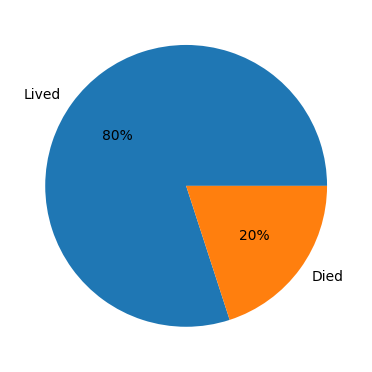

In [ ]:
#Distribucion de la variable repuesta o TARGET

a, b = df['TARGET'].value_counts()
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.pie([a, b], labels=["Lived", "Died"], autopct="%1.0f%%")
print(df["TARGET"].value_counts())

-------------------------------------------------------------------------------------------

**Observamos una buena distrbucion de los datos en las 3 variables analizadas, resaltando la variables SYS y HRA que parecen tener algunos valores atípicos.**

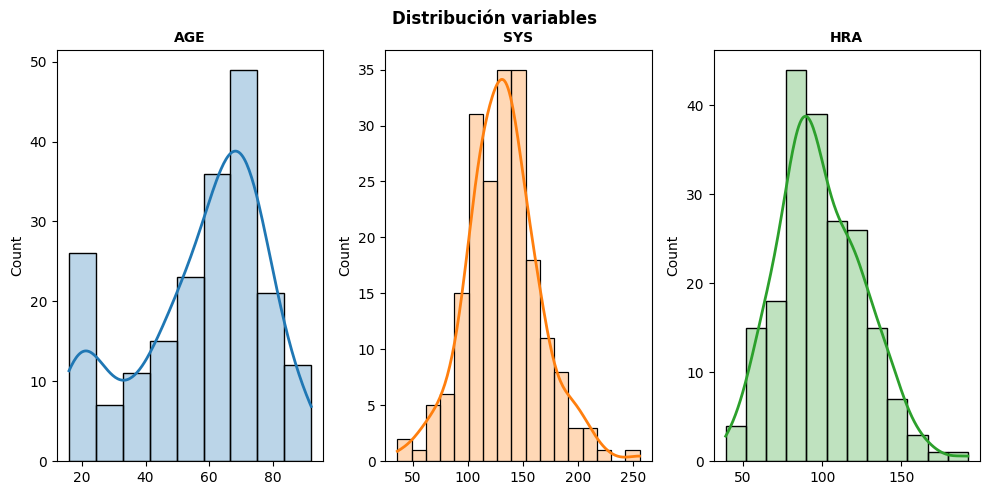

In [ ]:
#Distrbuciones de las variables analizadas en la parte descriptiva

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes = axes.flat
columnas= ['AGE', 'SYS' , 'HRA']

for i, colum in enumerate(columnas):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables', fontsize = 12, fontweight = "bold");


-----------------------------------------------------------------------------------------------

Podemos observar y confirmar las hipotesis plateadas anteriormente donde tenemos presencia de valores extremos en las variables SYS y HRA y como comentamos en las estadisticas descriptivas las mayorias de las variables que si bien estan estandarizadas pero los datos estan desbalanceados, observamos que sus distribuciones estan inclida hacia la izquierda lo que muestra una mayor proporcion a ser cero, en este caso a ser "No".

Para el modelo de Regresion Logigistica esta suposicion es importante ya que son sencible a los outliers como los demas modelos de regresiones, por lo que es recomendable tratar estos valores antes de ajustar un modelo para obtener resultados mas confiables.

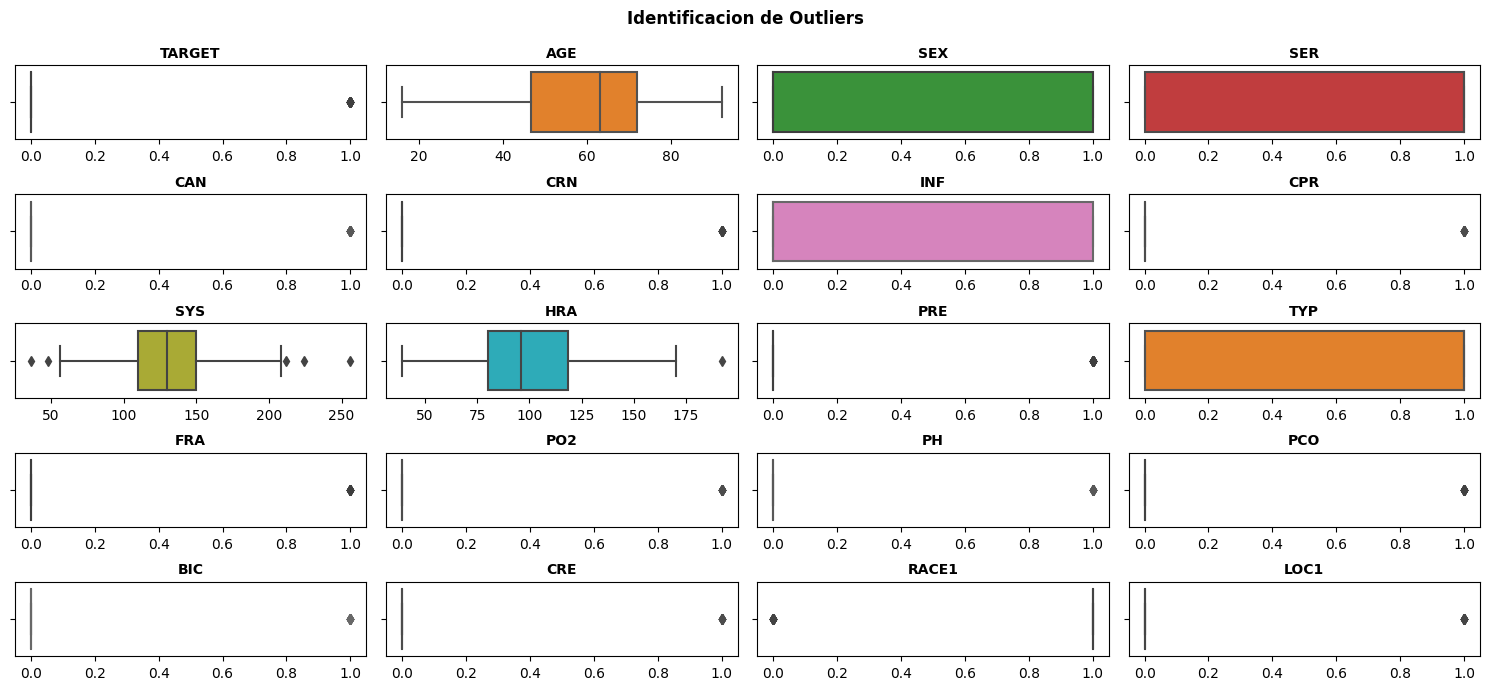

In [ ]:
#Gráfico para cada variables

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 7))
axes = axes.flat

for i, colum in enumerate(df.columns):
    sns.boxplot(
        data    = df,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Identificacion de Outliers', fontsize = 12, fontweight = "bold");

**Corrección de Outliers**

In [ ]:
#Remover los outliers en SYS y HRA

#Presión arterial sistólica al ingreso en la UCI (SYS)

Q3 = np.quantile(df['SYS'], 0.75)
Q1 = np.quantile(df['SYS'], 0.25)
IQR = Q3 - Q1

lower_sqft_basement = Q1 - 1.5 * IQR
upper_sqft_basement = Q3 + 1.5 * IQR

df = df[(df.SYS > lower_sqft_basement) & (df.SYS < upper_sqft_basement)]

# Frecuencia cardíaca en el ingreso a la UCI (HRA)

Q3 = np.quantile(df['HRA'], 0.75)
Q1 = np.quantile(df['HRA'], 0.25)
IQR = Q3 - Q1

lower_sqft_basement = Q1 - 1.5 * IQR
upper_sqft_basement = Q3 + 1.5 * IQR

df = df[(df.HRA > lower_sqft_basement) & (df.HRA < upper_sqft_basement)]

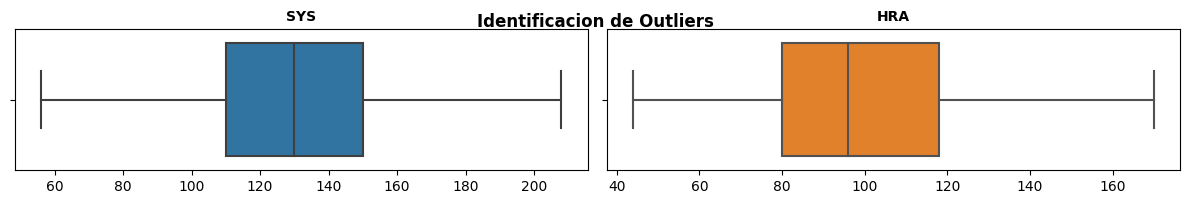

In [ ]:
#@title
#Gráfico para cada variables

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 2))
axes = axes.flat
columnas= ['SYS' , 'HRA']

for i, colum in enumerate(columnas):
    sns.boxplot(
        data    = df,
        x       = colum,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Identificacion de Outliers', fontsize = 12, fontweight = "bold");

-----------------------------------------------------------------------------------------------

**Correlación de las variables independientes con relacion a la variable objetivo**

Observando el nivel de correlaccion de las variables explicativas o independientes con relaccion a la variable a predecir u objetivo notamos que las 8 variables mas significativas o con mayor influencia en la clasificcion del modelo en que un paciente salga con vida o no son:

- Nivel de conciencia al ingreso en la UCI o estupor (LOC)
- Type of Admission (TYP)
- RCP antes de la admisión en la UCI (CPR) (Reanimacion cadiopulmonar)
- La edad (AGE)
- Probable infección en el ingreso a la UCI (INF)
- Antecedentes de insuficiencia renal crónica (CRN)
- Presión arterial sistólica al ingreso en la UCI (SYS)
- Servicio en UCI Admisión (SER)

Esto  quiere decir que estas variables tendran un efecto mayor a la hora del algorimo clasificar si saldra con vida o morirá por encima de las demas.

Selecionar las caracteristicas mas importantes es esencial a la hora de construir modelos mas simplificados, facil de interpretar y a la vez mas robusto, en ML mas variables no siempre es mejor, se debe evitar la redundancia y variables que no aportan al modelo.

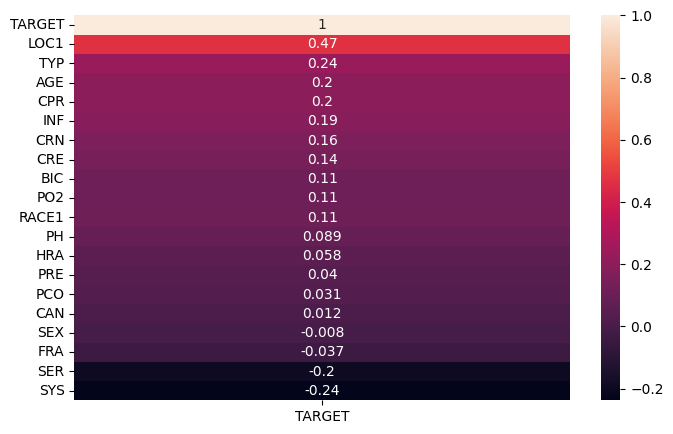

In [ ]:
#Observamos el nivel de correlacion de todas las variables independientes con respectos 'TARGERT' la dependiente
plt.figure(figsize = (8,5))
sns.heatmap(df.corr()[['TARGET']].sort_values(by='TARGET', ascending=False), annot = True)
plt.show()

**************************************************************************

**Colonialidad o Correlacion entre las variables independientes o explicativas**

Observamos que no existe colinealidad significativa entre las variables independientes mas importante.

Solo observamos una correlacion debil con un coeficiente de 0.29 entre las variables LOC y CPR la cual se debe a que esta variables guardan una relación porque el nivel de conciencia al ingresar a la UCI puede estar codicionada en que el paciente recibio reanimacion antes de entrar o no.

En el mismo orden, en el caso de CRE y CRN ambos conceptos estan relacionado ya que se toman en cuenta para evaluar los riñones de un paciencte si existe antecedente de insuficiencia renal posiblemente se evalualió la creatinina, por lo tanto, observamos una correlaccion debil con un coeficiente de 0.27.

Estos son los casos mas signifificativo y que por la naturaleza de las variables podrian afectar mas el modelo, sin embargo, no son de preocupacion ya que ninguna presentan una correlacion moderada o fuerte.

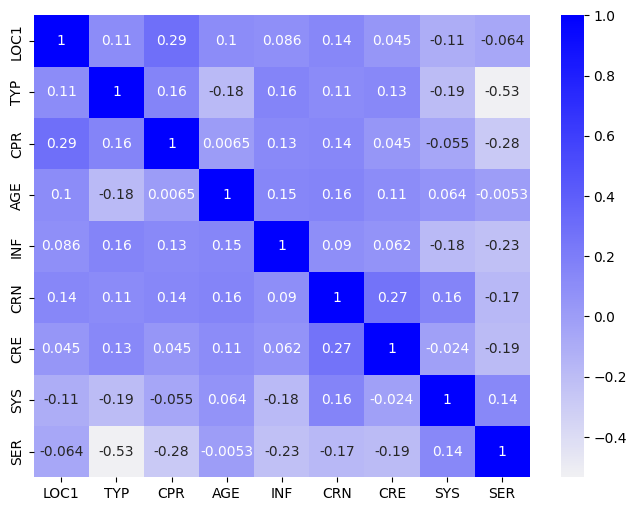

In [ ]:
#Analisis para variables mas importantes.
plt.figure(figsize=(8,6))
variables_significativas = ['LOC1', 'TYP', 'CPR','AGE','INF','CRN','CRE','SYS','SER']
corr = df[variables_significativas].corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()

## **Fase de Procesamiento**

In [ ]:
#Selecionamos nuestra variable dependiente y las independientes

y = df['TARGET']
x = df.drop('TARGET', axis = 1)

In [ ]:
#Preparamos nuestro set de entrenamiento y prueba con un split utilizando la opcion stratify para conservar la misma proporcion de la variable Target en los dos conjuntos.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

print(f'Tamaño datos entrenamiento: {x_train.shape[0]} muestras \nTamaño datos test: {x_test.shape[0]} muestras')

Tamaño datos entrenamiento: 155 muestras 
Tamaño datos test: 39 muestras


## **Modelado**

**Parametros:**

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Importamos el modelo de la libreria scikit-learn
from sklearn.linear_model import LogisticRegression

#Modelo LR
LR = LogisticRegression(max_iter = 500, # con el parametro por defecto con 100 intereacion muestra mensaje de convergencia ya que el dataset es pequeño para la funcion de coste 'lbfgs'
                        random_state = 0)

##Entrenamiento
model_lr = LR.fit(x_train, y_train.values.ravel())

#Predicion de probablidad continua (_prob) de y_train con los datos usado en el entrenamiento
y_pred_train = model_lr.predict_proba(x_train)
#Predicion de probabilidad continua (_prob) de y_test con los datos de prueba
y_pred_test = model_lr.predict_proba(x_test)

## **Fase de Validación**

In [ ]:
#Importamos las metricas de validacion ROC_AUC_SCORE, ROC_CURVE y  AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [ ]:
# CURVA ROC Y AUC para Training
fpr_train_LR, tpr_train_LR, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train_LR = auc(fpr_train_LR, tpr_train_LR)

# CURVA ROC Y AUC para Test
fpr_test_LR, tpr_test_LR, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test_LR = auc(fpr_test_LR, tpr_test_LR)

**Curva ROC & AUC**

Para el entrenamiento observamos una curva con un area o coeficiente AUC de 0.87 en la escala del (0-1) donde un valor cercado a (0.5) indica un modelo aleatorio, es decir, el modelo adivina, sin embargo en este caso con 0.87 nos indica un buen rendimiento del modelo que se traduce que el modelo puede distinguir entre la clase positiva y negativa de manera significativa pero aun tiene oportunidadad de mejora especialmente para por su rendimiento mas bajo con el set de prueba de 0.80, es decir, para el set de prueba la calidad del modelo es menor con datos que no no ha visto o no ha sido entrenado.

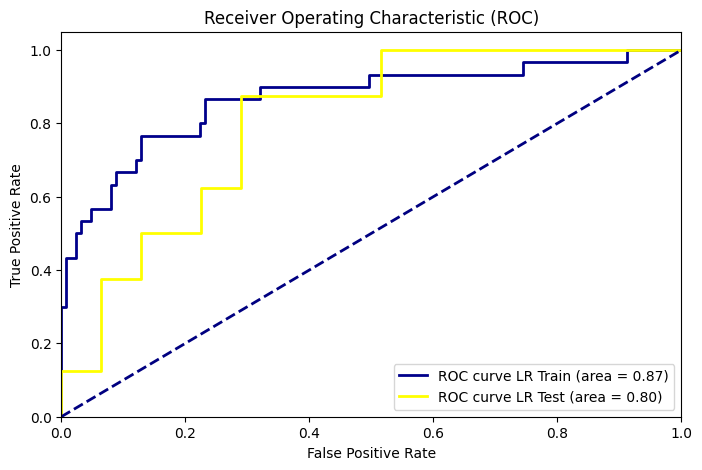

In [ ]:
plt.figure(figsize = (8,5))
lw = 2

plt.plot(fpr_train_LR,tpr_train_LR,color="darkblue",lw=lw,label="ROC curve LR Train (area = %0.2f)" % roc_auc_train_LR,)
plt.plot(fpr_test_LR,tpr_test_LR,color="yellow",lw=lw,label="ROC curve LR Test (area = %0.2f)" % roc_auc_test_LR,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

-----------------------------------------------------------------------------------------------------

**Precision y matriz de Confusion**

La precisión de entrenamiento de Logistic Regression es del 87.74%. Esto significa que el modelo clasifica correctamente 88 de cada 100 casos en el conjunto de entrenamiento, sin embargo, El accuracy de prueba es del 82.05%. lo que nos indica un rendimiento aceptable en relacion a la precision pero con la salvedad que puede estar un poco en sobrejuste por la discrepacia entre la dos metricas.

Ahora bien, para la validacion con el set de prueba, notamos que la matriz de confusión muestra las predicciones del modelo en comparación con los valores reales en el conjunto de prueba. En este caso, la matriz de confusión muestra que el modelo clasificó correctamente los 31 casos de la clase "Lived" (0) y los 3 caosos de la clase "Died" (1). No se realizaron predicciones erróneas en la clase "Lived", mientras que se cometió un error al clasificar 7 casos de la clase "Died" lo cuales fueron clasificados como "Lived".

Esto es un claro indicio de que el modelo esta sesgado por el desbalance en la variable target, por lo tanto es recomendable dependiendo de la problematica y el objetivo del modelo utilizar tecnicas en este caso como validacion cruzadas de no ser posible aumentar las muestras de manera natural con mas datos para corregir el desbalance entonces utilizar la tecnica de muestreo **oversampling** para aumentar las muestras de la clase 1 y el modelo aprenda mejor a predecir "Died",tambien existe el undersampling pero no es recomendable por la perdida de informacion y mucho menos en este caso que la muestra de datos es pequeña, ahora bien desde mi cristerio por el tipo de problema lo recomendable es utilizar una tecnica para determinar mejor este comportamiento ya que se trata de un tema muy importante decirle a una persona que va a sobrevivir cuando en realidad es mas alta la probabilidad de que muera, es un tema delicado desde el punto de vista sentimental.

Continuando con la metrica F1 que es una medida combinada de precisión y recall que es útil para evaluar el rendimiento general del modelo, El f1-score para la clase "Lived" es del 93%, lo que indica un buen equilibrio entre precisión y recall. El f1-score para la clase "Died" es del 56%, lo que indica un rendimiento más bajo en comparación con la clase "Lived" comparando esto resultados con los resultados de validacion podemos deducir que el modelo no tiene un rendimiento tan buena para predecir la clase "Died" como para la clase "Lived" por lo tanto el modelo presenta ese sesgo.

Como notamos el modelo en general tiene un buen rendimiento si el objetivo es pedecir si vive, por lo tanto, es mportante tomar esto en cuenta para determinar si es necesario realizar mejoras.




In [ ]:
#Importamos la metrica de validacion Accuracy

from sklearn.metrics import accuracy_score, classification_report

accuracy_lr_train = accuracy_score(y_true = y_train, y_pred = model_lr.predict(x_train)  ,normalize = True)
print(f"El accuracy de training Logistic Regression es: {100*accuracy_lr_train:.2f}%")

confusion_matrix = pd.crosstab(
    y_train,
     model_lr.predict(x_train),
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['Lived', 'Died'], y_true = y_train, y_pred = model_lr.predict(x_train)))

print("--------------------------------------------------------------------------- ")

accuracy_lr_test = accuracy_score(y_true = y_test, y_pred = model_lr.predict(x_test) ,normalize = True)
print(f"El accuracy de test Logistic Regression es: {100*accuracy_lr_test:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     model_lr.predict(x_test),
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['Lived', 'Died'], y_true = y_test, y_pred = model_lr.predict(x_test)))

El accuracy de training Logistic Regression es: 87.74%
Predicción    0   1
Real               
0           124   1
1            18  12
 
              precision    recall  f1-score   support

       Lived       0.87      0.99      0.93       125
        Died       0.92      0.40      0.56        30

    accuracy                           0.88       155
   macro avg       0.90      0.70      0.74       155
weighted avg       0.88      0.88      0.86       155

--------------------------------------------------------------------------- 
El accuracy de test Logistic Regression es: 82.05%
Predicción   0  1
Real             
0           31  0
1            7  1
 
              precision    recall  f1-score   support

       Lived       0.82      1.00      0.90        31
        Died       1.00      0.12      0.22         8

    accuracy                           0.82        39
   macro avg       0.91      0.56      0.56        39
weighted avg       0.85      0.82      0.76        39



In [ ]:
# Convertir las probabilidades en etiquetas o binaria
y_pred_label = [0 if prob >= 0.5 else 1 for prob in y_pred_test[:, 0]]

# DataFrame con los datos reales, la etiqueta predicha y las probabilidades de cada clase
df_results = pd.DataFrame({
    'Label': y_test,
    'Predicted': y_pred_label,
    ' Probability_Lived': y_pred_test[:, 0],
    'Probability_Died': y_pred_test[:, 1]
})

# Mostrar el DataFrame con los resultados
df_results.head(10)

,Label,Predicted,Probability_Lived,Probability_Died
59,0,0,0.953132,0.046868
105,0,0,0.715798,0.284202
33,0,0,0.911508,0.088492
155,0,0,0.967991,0.032009
26,0,0,0.975835,0.024165
22,0,0,0.951711,0.048289
75,0,0,0.896546,0.103454
174,1,0,0.828416,0.171584
134,0,0,0.928517,0.071483
140,0,0,0.976316,0.023684


## **Modelo oversampling para mejorar la clase 1**
- Muestro de la variable objetivo para mitigar el desbalance entre las clases.

## **Fase de Procesamiento**

In [ ]:
# Oversamplimg para mitigar el desbalance para el entrenamiento

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print(f'Tamaño datos entrenamiento: {x_train_resampled.shape[0]} muestras \nTamaño datos test: {x_test.shape[0]} muestras')


Tamaño datos entrenamiento: 250 muestras 
Tamaño datos test: 39 muestras


In [ ]:
#Modelo LR Resampled

LR_1 = LogisticRegression(max_iter=500
                            , random_state=100)
##Entrenamiento
model_lr1 = LR_1.fit(x_train_resampled, y_train_resampled.values.ravel())

#Predicion de probablidad continua (_prob) de y_train con los datos usado en el entrenamiento
y_pred_train1 = model_lr1.predict_proba(x_train_resampled)
#Predicion de probabilidad continua (_prob) de y_test con los datos de prueba
y_pred_test1 = model_lr1.predict_proba(x_test)

# CURVA ROC Y AUC para Training
fpr_train_LR1, tpr_train_LR1, _ = roc_curve(y_train_resampled, y_pred_train1[:, 1])
roc_auc_train_LR1 = auc(fpr_train_LR1, tpr_train_LR1)

# CURVA ROC Y AUC para Test
fpr_test_LR1, tpr_test_LR1, _=  roc_curve(y_test, y_pred_test1[:, 1])
roc_auc_test_LR1 = auc(fpr_test_LR1, tpr_test_LR1)

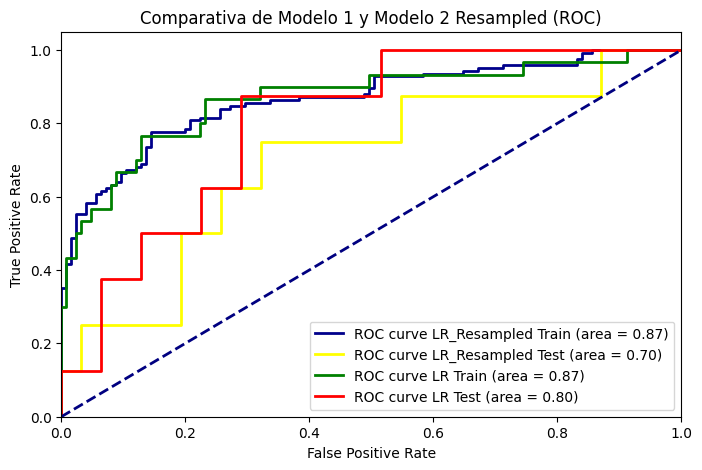

In [ ]:
plt.figure(figsize = (8,5))
lw = 2

plt.plot(fpr_train_LR1,tpr_train_LR1,color="darkblue",lw=lw,label="ROC curve LR_Resampled Train (area = %0.2f)" % roc_auc_train_LR1,)
plt.plot(fpr_test_LR1,tpr_test_LR1,color="yellow",lw=lw,label="ROC curve LR_Resampled Test (area = %0.2f)" % roc_auc_test_LR1,)

plt.plot(fpr_train_LR,tpr_train_LR,color="g",lw=lw,label="ROC curve LR Train (area = %0.2f)" % roc_auc_train_LR,)
plt.plot(fpr_test_LR,tpr_test_LR,color="r",lw=lw,label="ROC curve LR Test (area = %0.2f)" % roc_auc_test_LR,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparativa de Modelo 1 y Modelo 2 Resampled (ROC)")
plt.legend(loc="lower right")
plt.show()

Podemos observar los modelo 1 y modelo 2 como el oversampling mejoró la metrica del recall ayudando al aumentar las muestras de las clase 1 y poder clasificar  mas caso TP, sin embargo, en niveles generales afecto la precision para la clase 0  ya que aumentaron los FP (cuando eran "Lived" lo clasifico como "Died" ), por lo tanto, la mejora fue significativa para ese enfoque y tener modelo que generaliza mejor a pesar de sacrificar precision.

In [ ]:
#@title

print("MODDELO 1")

accuracy_lr_train = accuracy_score(y_true = y_train, y_pred = model_lr.predict(x_train)  ,normalize = True)
print(f"El accuracy de training Logistic Regression es: {100*accuracy_lr_train:.2f}%")

confusion_matrix = pd.crosstab(
    y_train,
     model_lr.predict(x_train),
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['Lived', 'Died'], y_true = y_train, y_pred = model_lr.predict(x_train)))



print("--------------------------------------------------------------------------- ")

print("MODDELO 2 CON OVERSMPLING")

accuracy_lr_train1 = accuracy_score(y_true = y_train_resampled, y_pred = model_lr1.predict(x_train_resampled)  ,normalize = True)
print(f"El accuracy de training Logistic Regression es: {100*accuracy_lr_train1:.2f}%")

confusion_matrix = pd.crosstab(
    y_train_resampled,
     model_lr1.predict(x_train_resampled),
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['Lived', 'Died'], y_true = y_train_resampled, y_pred = model_lr1.predict(x_train_resampled)))



MODDELO 1
El accuracy de training Logistic Regression es: 87.74%
Predicción    0   1
Real               
0           124   1
1            18  12
 
              precision    recall  f1-score   support

       Lived       0.87      0.99      0.93       125
        Died       0.92      0.40      0.56        30

    accuracy                           0.88       155
   macro avg       0.90      0.70      0.74       155
weighted avg       0.88      0.88      0.86       155

--------------------------------------------------------------------------- 
MODDELO 2 CON OVERSMPLING
El accuracy de training Logistic Regression es: 79.20%
Predicción   0    1
Real               
0           96   29
1           23  102
 
              precision    recall  f1-score   support

       Lived       0.81      0.77      0.79       125
        Died       0.78      0.82      0.80       125

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg  

# **Respuestas**

### **Utilizando regresión logística en Python y el dataset adjunto, responder lassiguientes preguntas:**

1. ¿Cuáles son las principales variables que influyen en que un paciente salga
con vida de la sala de cuidado intensivos?
2. ¿Cumple con todas hipótesis de validación de un buen modelo? Explique
3. ¿Puede este modelo explicar el comportamiento de los pacientes que
ingresan a la sala de cuidados intensivos? Explique
4. Comparar RL con otros modelos


### **1. ¿Cuáles son las principales variables que influyen en que un paciente salga con vida de la sala de cuidado intensivos?**

De acuerdo al nivel de correlaccion de las variables explicativas o independientes con relaccion a la variable a predecir u objetivo notamos que las 7 variables mas significativas o que explica mejor el modelo y por lo tanto en que un paciente salga con vida o no son:

- Nivel de conciencia al ingreso en la UCI o estupor (LOC)
- Type of Admission (TYP)
- RCP antes de la admisión en la UCI (CPR) (Reanimacion cadiopulmonar)
- La edad (AGE)
- Probable infección en el ingreso a la UCI (INF)
- Presión arterial sistólica al ingreso en la UCI (SYS)
- Servicio en UCI Admisión (SER)

Esto nos quiere decir que estas variables tendran un efecto mayor a la hora del determinar si saldra con vida o morirá por encima de las demas, no obstante, de manera empirica y analizando el contexto podemos dedudcir las influencias de estas variables por ejemplo, tipo de admision es poco probable que un paciente que ingrese por urgencia tenga mas probalidad que un paciente que ingrese normal, de esta manera con respecto a la edad o si estaba conciente o en coma, etc.

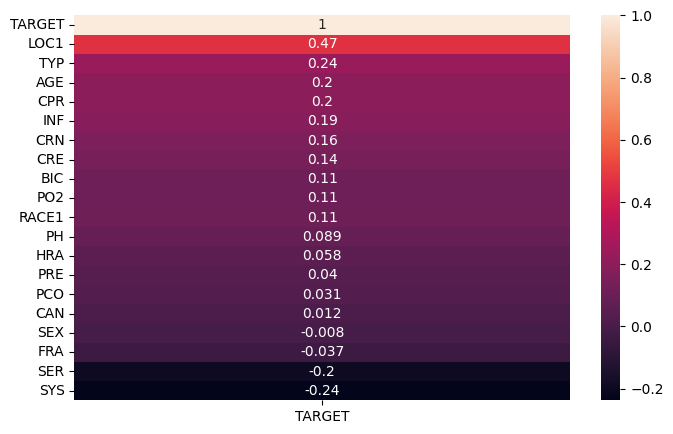

In [ ]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr()[['TARGET']].sort_values(by='TARGET', ascending=False), annot = True)
plt.show()

### **2. ¿Cumple con todas hipótesis de validación de un buen modelo? Explique**

De acuerdo al analisis del conjunto de datos, las diferentes validaciones de los supuestos, el problema tratado y resultados del modelo incluso en comparacion con otros, tomando en cuenta un modelo sin optimizar y con pocos datos, entiendo que es aceptable por las siguientes razones:

El modelo presenta un buen rendimiento tanto para el set de entrenamiento como para el set de prueba en termino de precision y ajuste, con la observacion de que las clases estan desbalanceadas y no le favorece pero es un tema de enfoque en la problematica y que se quiere lograr con el modelo, por lo tanto, para predecir si un paciente que ingresa a la UCI sobrevive si en la mayoria de los casos el modelo va a realizar prediciones correcta, pero si quisieramos tener un modelo para enforcarnos en predecir si va a morir o no con mas importancia entonces en ese enfoque tendriamos un modelo no tan bueno como en el caso del Naives Bayes en las pruebas realizadas que puede generalizar mejor entre las clases.

De acuerdo con los supuestos para la regresion logisticas el conjunto de datos no presenta colonialidad entre las variables independientes especialemente en la que tiene mayor influencia en el modelo, las variables independendientes estan linealmente relacionadas con la variable objetivo, no contamos con valores atipicos que sesguen el modelo ya que lo mismos fueron manejado, por lo tanto, sus prediciones son bastante confiables.


### **3.¿Puede este modelo explicar el comportamiento de los pacientes que ingresan a la sala de cuidados intensivos? Explique**

Si en cierta medida, basado en las variables recolectadas, el modelo puede darnos la probabilidad en que caso  y que bien explica comportantemiento con buena precision, ya que en general podria clasificar si el paciencia sobrevive o morira en mas de 80% de los casos, y estadisticamente podemos validar este comportamiento en los datos historicos.

### **4. Comparar RL con otros modelos**

#### **Comparar RL con otros modelos utilizandos datos del primer modelo (No Resampled)**

In [ ]:
#Espeficicamos los diferentes algorimo importados de scikitlearn con los parametro por defecto
#Ya que probaremos cual tiene mejor rendimiento con el conjunto de datos

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


models = []

models.append(('LR', LogisticRegression(max_iter= 500)))
models.append(('KNN',  KNeighborsClassifier()))
models.append(('GNB',  GaussianNB()))
models.append(('DT',  DecisionTreeClassifier()))

A partir de los resultados obtenidos en la comparativa de los diferentes modelos formulados, resulta que la regresion logitica tiene un resultado mas consistente en la validacion cruzada donde presenta menor desviacion en los resultados y la mejor precision, por lo tanto no hay duda que en estos terminos para el conjunto de datos trabajando este modelo resulta mejor, sin embargo,  vamos a comparar estos modelos en las demas metricas para determinar en general cual modelo tienen mas calidad.

In [ ]:
#@title
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
names = []
precision_promedio = []
desviacion = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=skfold)
    results.append(cv_results)
    names.append(name)
    precision_promedio.append(cv_results.mean())
    desviacion.append(cv_results.std())

# Crear un diccionario con los resultados y nombres
data = {'Modelo': names
        , 'Precision_promedio': precision_promedio
        , 'Desviacion': desviacion}

# Crear el DataFrame
df_resultados = pd.DataFrame(data)

# Imprimir el DataFrame
df_resultados.sort_values('Desviacion')



,Modelo,Precision_promedio,Desviacion
0,LR,0.851613,0.025806
1,KNN,0.819355,0.032897
2,GNB,0.787097,0.052413
3,DT,0.761290,0.059830


### **Arbol de decision**

In [ ]:
#Modelo DT
DT = models[3][1]

##Entrenamiento
model_DT = DT.fit(x_train, y_train.values.ravel())

#Predicion de probablidad continua (_prob) de y_train con los datos usado en el entrenamiento
y_pred_train_DT = model_DT.predict_proba(x_train)
#Predicion de probabilidad continua (_prob) de y_test con los datos de prueba
y_pred_test_DT = model_DT.predict_proba(x_test)

print(DT)

# CURVA ROC Y AUC para Training
fpr_train_DT, tpr_train_DT, _ = roc_curve(y_train, y_pred_train_DT[:, 1])
roc_auc_train_DT = auc(fpr_train_DT, tpr_train_DT)

# CURVA ROC Y AUC para Test
fpr_test_DT, tpr_test_DT, _ = roc_curve(y_test, y_pred_test_DT[:, 1])
roc_auc_test_DT = auc(fpr_test_DT, tpr_test_DT)

DecisionTreeClassifier()


### **Naive Bayes**

In [ ]:
#Modelo GNB
GNB = models[2][1]

##Entrenamiento
model_GNB = GNB.fit(x_train, y_train.values.ravel())

#Predicion de probablidad continua (_prob) de y_train con los datos usado en el entrenamiento
y_pred_train_GNB = model_GNB.predict_proba(x_train)
#Predicion de probabilidad continua (_prob) de y_test con los datos de prueba
y_pred_test_GNB = model_GNB.predict_proba(x_test)

print(GNB)

# CURVA ROC Y AUC para Training
fpr_train_GNB, tpr_train_GNB, _ = roc_curve(y_train, y_pred_train_GNB[:, 1])
roc_auc_train_GNB = auc(fpr_train_GNB, tpr_train_GNB)

# CURVA ROC Y AUC para Test
fpr_test_GNB, tpr_test_GNB, _ = roc_curve(y_test, y_pred_test_GNB[:, 1])
roc_auc_test_GNB = auc(fpr_test_GNB, tpr_test_GNB)

GaussianNB()


### **K Vecino mas cercano**

In [ ]:
#Modelo KNN
KNN = models[1][1]

##Entrenamiento
model_KNN = KNN.fit(x_train, y_train.values.ravel())

#Predicion de probablidad continua (_prob) de y_train con los datos usado en el entrenamiento
y_pred_train_KNN = model_KNN.predict_proba(x_train)
#Predicion de probabilidad continua (_prob) de y_test con los datos de prueba
y_pred_test_KNN = model_KNN.predict_proba(x_test)

print(KNN)

# CURVA ROC Y AUC para Training
fpr_train_KNN, tpr_train_KNN, _ = roc_curve(y_train, y_pred_train_KNN[:, 1])
roc_auc_train_KNN = auc(fpr_train_KNN, tpr_train_KNN)

# CURVA ROC Y AUC para Test
fpr_test_KNN, tpr_test_KNN, _ = roc_curve(y_test, y_pred_test_KNN[:, 1])
roc_auc_test_KNN = auc(fpr_test_KNN, tpr_test_KNN)

KNeighborsClassifier()


A siemple vista podemos visualizar los rendimientos de los diferentes modelos tanto en el entrenamiento como con datos de pruebas y resaltar que el modelo GNB (rojo) es el que tiene mejor calidad a nivel general, y esto se debe a que no presenta sobre ajuste y por como se ajusta en la curva roc nos indica que puede diferenciar con gran precision tanto en los datos de entrenamiento como en los datos nuevos.

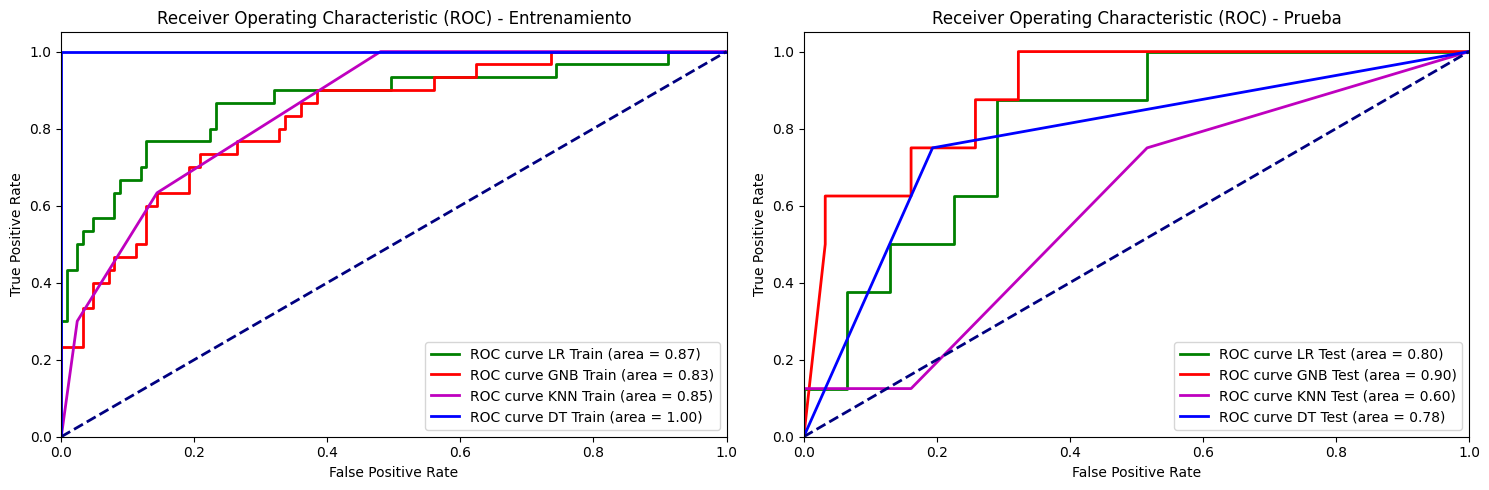

In [ ]:

plt.figure(figsize=(15, 5))

# Gráfico de Curvas ROC para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(fpr_train_LR, tpr_train_LR, color="g", lw=lw, label="ROC curve LR Train (area = %0.2f)" % roc_auc_train_LR)
plt.plot(fpr_train_GNB, tpr_train_GNB, color="r", lw=lw, label="ROC curve GNB Train (area = %0.2f)" % roc_auc_train_GNB)
plt.plot(fpr_train_KNN, tpr_train_KNN, color="m", lw=lw, label="ROC curve KNN Train (area = %0.2f)" % roc_auc_train_KNN)
plt.plot(fpr_train_DT, tpr_train_DT, color="b", lw=lw, label="ROC curve DT Train (area = %0.2f)" % roc_auc_train_DT)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) - Entrenamiento")
plt.legend(loc="lower right")

# Gráfico de Curvas ROC para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.plot(fpr_test_LR, tpr_test_LR, color="g", lw=lw, label="ROC curve LR Test (area = %0.2f)" % roc_auc_test_LR)
plt.plot(fpr_test_GNB, tpr_test_GNB, color="r", lw=lw, label="ROC curve GNB Test (area = %0.2f)" % roc_auc_test_GNB)
plt.plot(fpr_test_KNN, tpr_test_KNN, color="m", lw=lw, label="ROC curve KNN Test (area = %0.2f)" % roc_auc_test_KNN)
plt.plot(fpr_test_DT, tpr_test_DT, color="b", lw=lw, label="ROC curve DT Test (area = %0.2f)" % roc_auc_test_DT)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) - Prueba")
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


## **Validaciones con los datos de entrenamiento**

In [ ]:
print("MODDELO LR")

accuracy_lr_train = accuracy_score(y_true = y_train, y_pred = model_lr.predict(x_train)  ,normalize = True)
print(f"El accuracy de training Logistic Regression es: {100*accuracy_lr_train:.2f}%")

confusion_matrix = pd.crosstab(
    y_train,
     model_lr.predict(x_train),
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['Lived', 'Died'], y_true = y_train, y_pred = model_lr.predict(x_train)))



print("--------------------------------------------------------------------------- ")

print("MODDELO GNB")

accuracy_GNB_train1 = accuracy_score(y_true = y_train, y_pred = model_GNB.predict(x_train)  ,normalize = True)
print(f"El accuracy de training GNB es: {100*accuracy_GNB_train1:.2f}%")

confusion_matrix = pd.crosstab(
    y_train,
     model_GNB.predict(x_train),
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['Lived', 'Died'], y_true = y_train, y_pred = model_GNB.predict(x_train)))

MODDELO LR
El accuracy de training Logistic Regression es: 87.74%
Predicción    0   1
Real               
0           124   1
1            18  12
 
              precision    recall  f1-score   support

       Lived       0.87      0.99      0.93       125
        Died       0.92      0.40      0.56        30

    accuracy                           0.88       155
   macro avg       0.90      0.70      0.74       155
weighted avg       0.88      0.88      0.86       155

--------------------------------------------------------------------------- 
MODDELO GNB
El accuracy de training GNB es: 82.58%
Predicción    0   1
Real               
0           114  11
1            16  14
 
              precision    recall  f1-score   support

       Lived       0.88      0.91      0.89       125
        Died       0.56      0.47      0.51        30

    accuracy                           0.83       155
   macro avg       0.72      0.69      0.70       155
weighted avg       0.82      0.83      0.82

## **Validaciones con los datos de prueba**

In [ ]:
#@title
print("MODDELO LR")

accuracy_lr_train = accuracy_score(y_true = y_test, y_pred = model_lr.predict(x_test)  ,normalize = True)
print(f"El accuracy de Testing Logistic Regression es: {100*accuracy_lr_train:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     model_lr.predict(x_test),
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['Lived', 'Died'], y_true = y_test, y_pred = model_lr.predict(x_test)))



print("--------------------------------------------------------------------------- ")

print("MODDELO GNB")

accuracy_GNB_train1 = accuracy_score(y_true = y_test, y_pred = model_GNB.predict(x_test)  ,normalize = True)
print(f"El accuracy de Testing GNB es: {100*accuracy_GNB_train1:.2f}%")

confusion_matrix = pd.crosstab(
    y_test,
     model_GNB.predict(x_test),
    rownames=['Real'],
    colnames=['Predicción'])

print(confusion_matrix)
print(" ")
print(classification_report(target_names = ['Lived', 'Died'], y_true = y_test, y_pred = model_GNB.predict(x_test)))

MODDELO LR
El accuracy de Testing Logistic Regression es: 82.05%
Predicción   0  1
Real             
0           31  0
1            7  1
 
              precision    recall  f1-score   support

       Lived       0.82      1.00      0.90        31
        Died       1.00      0.12      0.22         8

    accuracy                           0.82        39
   macro avg       0.91      0.56      0.56        39
weighted avg       0.85      0.82      0.76        39

--------------------------------------------------------------------------- 
MODDELO GNB
El accuracy de Testing GNB es: 87.18%
Predicción   0  1
Real             
0           29  2
1            3  5
 
              precision    recall  f1-score   support

       Lived       0.91      0.94      0.92        31
        Died       0.71      0.62      0.67         8

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39



#### **En conclusion**

Para el conjunto de datos utilizado podemos concluir que el modelo con mejor rendimiento y que generaliza mejor es la Naive Bayes esto se debe a que estos modelos son menos propenso a sobre ajustarse en comparacioncon otros en especial cuando hay conjunto de datos pequeños como es este caso, la regresion logistica tiene un buen rendimiento y en especial comparandola con los demas modelos, sin embargo desde el primer ejercicios vamos viendo indicios de sobre ajuste que bien se puede manejar pero en los datos de prueba el modelo no generaliza lo suficiente, y este sobreajuste es mas grave en los demas modelos ,lo podemos notar donde el coeficiete de la curva para el set de entrenamiento y prueba tienen una discrepancia significativa debido a que estos modelos estan aprediendo patrones especificos y cuando se enfreta a datos nuevos no pueden generalizar, de acuerdo al coeficiente para el modelo knn y DT con el conjunto de prueba esta haciendo prediciones aleatoria ya que su coeficiente es muy cercado a 0.5, es decir que estos modelos no puede distinguir bien entre las clases, sin embargo, para el modelo Naives Bayes obtenemos una metricas muy superiores en termino general del modelo en comparacion con su mas cercano que es la regresion.